## Tips and Tricks

#### Pandas tem diversas outras funcionalidades, e ainda podemos combinar mais de uma delas juntas pra obter diferentes resultados.,,

Nessa parte, vamos passar por algumas que se mostram bem úteis ao longo dos trabalhos de análise e processamento de dados...



In [1]:
#Primeiro, carregamos as bibliotecas:
import numpy as np
import pandas as pd

In [2]:
#Vamos aproveitar o mesmo dataset que utilizamos antes, o famoso IRIS_DATA
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns=iris.feature_names + ['target'])

df.tail(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [3]:
#Usualmente, nas primeiras etapas, queremos conhecer nossos dados, então é muito comum rodas as sequintes funções:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [10]:
#Sumário estatístico de cada coluna
df[['petal width (cm)','target']].describe()

,petal width (cm),target
count,150.000000,150.000000
mean,1.199333,1.000000
std,0.762238,0.819232
min,0.100000,0.000000
25%,0.300000,0.000000
50%,1.300000,1.000000
75%,1.800000,2.000000
max,2.500000,2.000000


In [5]:
#Um jeito rápido de obter a dimensão é usar 'shape'
df.shape

(150, 5)

In [7]:
#Valores únicos existentes em cada coluna
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [6]:
#Valores únicos de uma coluna:
df['target'].nunique()

3

In [12]:
#E, obviamente, queremos saber quais são esses valores únicos
df['target'].unique()

array([0., 1., 2.])

In [7]:
#Depois de saber quantos únicos temos e quais eles são, o passo natural é saber como estão distribuidos:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [16]:
#Essa aqui é minha favorita: Correlação de todos os valores por todos:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [14]:
#Outra tarefa comum é querer aplicar alguma transformação em alguma coluna...
#Podemos fazer isso definindo uma função qualquer:

def to_category(x):
    if x == 0:
        return 'Setosa'
    elif x == 1:
        return 'Virginica'
    else:
        return 'Versicolor'


In [15]:
#E após isso, usamos apply para a coluna que desejamos
df['target2'] = df['target'].apply(to_category)
print(df['target2'].value_counts())
df.head()

Virginica     50
Versicolor    50
Setosa        50
Name: target2, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
0,5.1,3.5,1.4,0.2,0.0,Setosa
1,4.9,3.0,1.4,0.2,0.0,Setosa
2,4.7,3.2,1.3,0.2,0.0,Setosa
3,4.6,3.1,1.5,0.2,0.0,Setosa
4,5.0,3.6,1.4,0.2,0.0,Setosa


In [20]:
#Criando níveis por categoria, método 2

level_map = {0: 'espécie1', 1: 'espécie2', 2: 'espécie3'}
df['target3'] = df['target'].map(level_map)
print(df['target3'].value_counts())
df.head()

espécie3    50
espécie2    50
espécie1    50
Name: target3, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2,target3
0,5.1,3.5,1.4,0.2,0.0,Setosa,espécie1
1,4.9,3.0,1.4,0.2,0.0,Setosa,espécie1
2,4.7,3.2,1.3,0.2,0.0,Setosa,espécie1
3,4.6,3.1,1.5,0.2,0.0,Setosa,espécie1
4,5.0,3.6,1.4,0.2,0.0,Setosa,espécie1


In [21]:
#As vezes, queremos armazenar o nome das colunas em uma lista:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target2', 'target3'],
      dtype='object')

In [23]:
#E também os index
df.index

RangeIndex(start=0, stop=150, step=1)

In [24]:
#Podemos ordenar por alguma coluna
df.sort_values(by='sepal width (cm)', inplace=True)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2,target3
60,5.0,2.0,3.5,1.0,1.0,Virginica,espécie2
62,6.0,2.2,4.0,1.0,1.0,Virginica,espécie2
119,6.0,2.2,5.0,1.5,2.0,Versicolor,espécie3
68,6.2,2.2,4.5,1.5,1.0,Virginica,espécie2
41,4.5,2.3,1.3,0.3,0.0,Setosa,espécie1
53,5.5,2.3,4.0,1.3,1.0,Virginica,espécie2
93,5.0,2.3,3.3,1.0,1.0,Virginica,espécie2
87,6.3,2.3,4.4,1.3,1.0,Virginica,espécie2
81,5.5,2.4,3.7,1.0,1.0,Virginica,espécie2
80,5.5,2.4,3.8,1.1,1.0,Virginica,espécie2


In [16]:
#Podemos ordenar por alguma coluna
df.sort_values(by='sepal width (cm)', ascending=False, inplace=True)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
15,5.7,4.4,1.5,0.4,0.0,Setosa
33,5.5,4.2,1.4,0.2,0.0,Setosa
32,5.2,4.1,1.5,0.1,0.0,Setosa
14,5.8,4.0,1.2,0.2,0.0,Setosa
16,5.4,3.9,1.3,0.4,0.0,Setosa
5,5.4,3.9,1.7,0.4,0.0,Setosa
46,5.1,3.8,1.6,0.2,0.0,Setosa
18,5.7,3.8,1.7,0.3,0.0,Setosa
44,5.1,3.8,1.9,0.4,0.0,Setosa
19,5.1,3.8,1.5,0.3,0.0,Setosa


In [19]:
#Podemos ordenar por alguma coluna
df.sort_values(['sepal width (cm)', 'petal length (cm)'], ascending=[True, False], inplace=True)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
60,5.0,2.0,3.5,1.0,1.0,Virginica
119,6.0,2.2,5.0,1.5,2.0,Versicolor
68,6.2,2.2,4.5,1.5,1.0,Virginica
62,6.0,2.2,4.0,1.0,1.0,Virginica
87,6.3,2.3,4.4,1.3,1.0,Virginica
53,5.5,2.3,4.0,1.3,1.0,Virginica
93,5.0,2.3,3.3,1.0,1.0,Virginica
41,4.5,2.3,1.3,0.3,0.0,Setosa
80,5.5,2.4,3.8,1.1,1.0,Virginica
81,5.5,2.4,3.7,1.0,1.0,Virginica


In [20]:
#Algo que é bem bacana também é, por exemplo, poder separar o nome do pessoal em diferentes colunas:

lista = ['Rodrigo Biasuz', 'Tony Stark', 'Steve Rogers', 'Bruce Banner', 'Natasha Hommanoff']

df1 = pd.DataFrame(lista, columns=['Nome'])
df1

,Nome
0,Rodrigo Biasuz
1,Tony Stark
2,Steve Rogers
3,Bruce Banner
4,Natasha Hommanoff


In [21]:
#Podemos colocar numa lista
df1['Nome2'] = df1['Nome'].str.split(" ", expand=False)
df1

,Nome,Nome2
0,Rodrigo Biasuz,"[Rodrigo, Biasuz]"
1,Tony Stark,"[Tony, Stark]"
2,Steve Rogers,"[Steve, Rogers]"
3,Bruce Banner,"[Bruce, Banner]"
4,Natasha Hommanoff,"[Natasha, Hommanoff]"


In [24]:
#Ou em diferentes colunas
df1[['Nome3', 'Nome4']] = df1['Nome'].str.split(" ", expand=True)
df1

,Nome,Nome2,Nome3,Nome4
0,Rodrigo Biasuz,"[Rodrigo, Biasuz]",Rodrigo,Biasuz
1,Tony Stark,"[Tony, Stark]",Tony,Stark
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff


In [25]:
#Se precisar deslocar seu DataFrame pra baixo ou pra cima, temos o método shift
df1.shift(1)

,Nome,Nome2,Nome3,Nome4
0,NaN,NaN,NaN,NaN
1,Rodrigo Biasuz,"[Rodrigo, Biasuz]",Rodrigo,Biasuz
2,Tony Stark,"[Tony, Stark]",Tony,Stark
3,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
4,Bruce Banner,"[Bruce, Banner]",Bruce,Banner


In [27]:
df1.shift(-1)

,Nome,Nome2,Nome3,Nome4
0,Tony Stark,"[Tony, Stark]",Tony,Stark
1,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
2,Bruce Banner,"[Bruce, Banner]",Bruce,Banner
3,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff
4,NaN,NaN,NaN,NaN


In [28]:

#criando uma coluna numérica pra testarmos outra função:

coluna = []
for i in range(df1.shape[0]):
    coluna.append(np.random.randint(10))
    
df1['numérica'] = coluna

df1['numérica 2'] = df1['numérica']/23
df1


,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Rodrigo Biasuz,"[Rodrigo, Biasuz]",Rodrigo,Biasuz,4,0.173913
1,Tony Stark,"[Tony, Stark]",Tony,Stark,2,0.086957
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,3,0.130435
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,8,0.347826
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,6,0.260870


In [29]:
#Seguidamente nossos dados tem muitas colunas, mas precisamos apenas das numérias, ou as de texto...
df1.select_dtypes(include=['float64', 'int64'])

,numérica,numérica 2
0,4,0.173913
1,2,0.086957
2,3,0.130435
3,8,0.347826
4,6,0.260870


In [32]:
#Seguidamente nossos dados tem muitas colunas, mas precisamos apenas das numérias, ou as de texto...
df1.select_dtypes(include=['object'])

,Nome,Nome2,Nome3,Nome4
0,Rodrigo Biasuz,"[Rodrigo, Biasuz]",Rodrigo,Biasuz
1,Tony Stark,"[Tony, Stark]",Tony,Stark
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff


In [33]:
#Cópia!
#EXTREMAMENTE IMPORTANTE!

df2 = df1.copy()
df2

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Rodrigo Biasuz,"[Rodrigo, Biasuz]",Rodrigo,Biasuz,4,0.173913
1,Tony Stark,"[Tony, Stark]",Tony,Stark,2,0.086957
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,3,0.130435
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,8,0.347826
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,6,0.260870


In [37]:
#Iterar pelas colunas:
for col in df1:
    print(col)

Nome
Nome2
Nome3
Nome4
numérica
numérica 2


In [38]:
#Iterar pelas linhas:
for index, row in df1.iterrows():
    print (row['Nome'], index)

Rodrigo Biasuz 0
Tony Stark 1
Steve Rogers 2
Bruce Banner 3
Natasha Hommanoff 4


In [39]:
#Juntar duas colunas:
df1['juntando'] = df1["numérica"].astype(str) + ' - ' + df1["Nome"]
df1

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2,juntando
0,Rodrigo Biasuz,"[Rodrigo, Biasuz]",Rodrigo,Biasuz,4,0.173913,4 - Rodrigo Biasuz
1,Tony Stark,"[Tony, Stark]",Tony,Stark,2,0.086957,2 - Tony Stark
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,3,0.130435,3 - Steve Rogers
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,8,0.347826,8 - Bruce Banner
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,6,0.260870,6 - Natasha Hommanoff


In [54]:
df3 = pd.DataFrame(np.random.rand(5,5))
df3

,0,1,2,3,4
0,0.737804,0.936064,0.038046,0.333498,0.977356
1,0.856312,0.209056,0.968104,0.814426,0.576119
2,0.551498,0.151691,0.918151,0.232993,0.145853
3,0.022107,0.573407,0.824900,0.757221,0.588631
4,0.173686,0.281816,0.412459,0.347646,0.136849


In [55]:
#Adicionando um somatório no fim e no inicio
df3['col_total']     = df3.apply(lambda x: sum(x), axis=1)
df3.loc['row_total'] = df3.apply(lambda x: sum(x))
df3

,0,1,2,3,4,col_total
0,0.737804,0.936064,0.038046,0.333498,0.977356,3.022767
1,0.856312,0.209056,0.968104,0.814426,0.576119,3.424017
2,0.551498,0.151691,0.918151,0.232993,0.145853,2.000187
3,0.022107,0.573407,0.824900,0.757221,0.588631,2.766266
4,0.173686,0.281816,0.412459,0.347646,0.136849,1.352456
row_total,2.341407,2.152034,3.161661,2.485784,2.424807,12.565693


In [77]:
#Criando um index de data usando data inicial e o número de períodos
df = pd.DataFrame(
    np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'],
    index=pd.date_range('1/1/2000', periods=1000)
                 )

In [78]:
df

,A,B,C,D
2000-01-01,-0.835091,-0.528475,0.281494,0.199902
2000-01-02,0.371377,0.564297,-0.139777,-1.448186
2000-01-03,-0.085869,-0.527069,1.034410,0.513846
2000-01-04,2.267585,-1.038400,-0.270813,-0.170237
2000-01-05,0.464902,-1.332176,1.102539,-0.132405
2000-01-06,-0.274068,-1.186662,0.623149,-0.798015
2000-01-07,1.462245,-0.454430,0.186713,1.095549
2000-01-08,-0.530010,0.500865,-0.095136,1.976570
2000-01-09,-0.520477,0.024764,0.565321,0.504327
2000-01-10,-2.300331,-1.040817,0.570416,-0.474133


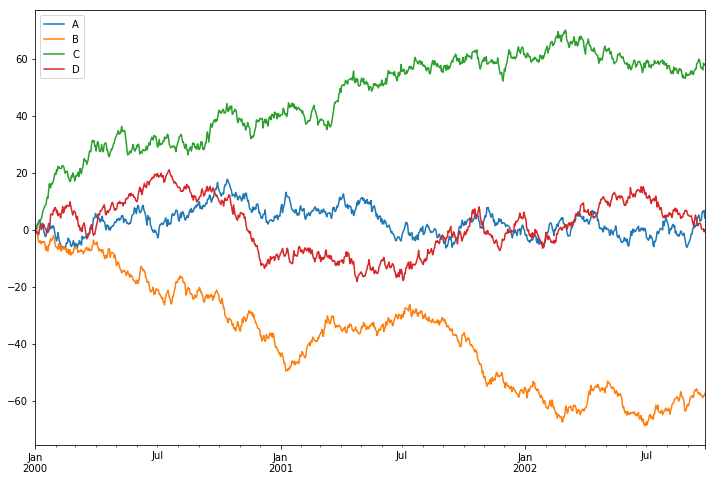

In [79]:
df = df.cumsum()
df.plot(figsize=(12,8))